# Figure 4: Household reproduction number over both neighbourhoods versus $r$

## Abby Barlow, University of Bath
## Ben Adams, University of Bath

### Importing required libraries

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from scipy.integrate import odeint, solve_ivp
from scipy.optimize import fsolve

### Importing required scripts

In [2]:
import importlib
import R_star_construct
import Keeling_model

importlib.reload(R_star_construct)
importlib.reload(Keeling_model)

Rstar = R_star_construct.Rstar
Rstar_solve = R_star_construct.Rstar_solve
RstarAnal = R_star_construct.RstarAnal
ConfigsConstruct = Keeling_model.ConfigsConstruct

### Parameters

In [3]:
h2 = 2520                    # no. of households in neighbourhood 2
n2 = 2                       # size of households for neighbourhood 2
Inf1,Inf2 = 1,0              # initial no. of infections in each neighbourhood
gamma = 0.2                  # recovery rate from infection
N2 = 5040                    # Neighbourhood (2) population size
N_neigh = 2                  # no. of neighbourhoods

In [4]:
## fixing contact rates alpha and beta

nu = 3      # good range 1 to 6
beta = fsolve(RstarAnal,0.5,(gamma,nu))[0]
alpha = beta/nu
alpha=round(alpha,2)
beta=round(beta,2)
alpha,beta

(0.27, 0.8)

### Producing figure

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


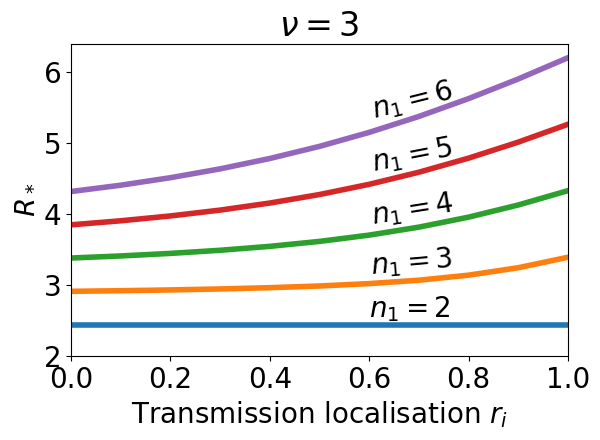

In [5]:
plt.rcParams.update({'font.size': 20})
pvec = np.arange(0,1.1,0.1)          # list of r values

n1vec = [2,3,4,5,6]                  # list of household sizes, neighbourhood 1
h1vec = [2520,1680,1260,1008,840]    # list of no. of houses in neighbourhood 1 for each house size 
plots = len(n1vec)                   # no. of curves plotting 

for plot in range(plots):            
    n1 = n1vec[plot]              # set household sizes and no. of household in neigh 1 for curve
    h1 = h1vec[plot]
    H = np.array([h1,h2])         # array of number of households in each neighbourhood
    N = np.array([n1,n2])         # array of household size for each neighbourhood
    
    R_star = np.zeros(len(pvec))   # initialising arrays to store R_star and it's components
    R1star = np.zeros(len(pvec))
    R2star = np.zeros(len(pvec))
    R11 = np.zeros(len(pvec))
    R12 = np.zeros(len(pvec))
    R21 = np.zeros(len(pvec))
    R22 = np.zeros(len(pvec))

    configs1,n_configs1 = ConfigsConstruct(n1)  # defining the set of household configurations
    configs2,n_configs2 = ConfigsConstruct(n2)

    y0 = np.zeros(n_configs1+n_configs2)     # state space is each of the possible household configurations accross the 2 neighbourhoods
    y0[0] = (h1 - Inf1)/h1                   # propn of households neighbourhood 1 made up of susceptibles only
    y0[1] = Inf1/h1                          # propn of households neighbourhood 1 with one initial infected
    y0[n_configs1] = (h2 - Inf2)/h2          # propn of households neighbourhood 2 made up of susceptibles only
    y0[n_configs1+1] = Inf2/h2               # propn of households neighbourhood 2 with one initial infected

    for i in range(len(pvec)):                     # looping over the range of r values
        p_reserve = np.array([pvec[i],pvec[i]])    
        rho = np.zeros((N_neigh,N_neigh))          # initialising array to store rho values each iteration
        
        if pvec[i] == 1:        # if r=1, use separate case to avoid division by 0
            rho[0,0] = 1
            rho[1,1] = 1
        
        else:
            for k in range(N_neigh):    # define rho from r
                for j in range(N_neigh):
                    rho[k,j] = (1-p_reserve[k])*(1-p_reserve[j])*H[j]*N[j]/(np.sum((1-p_reserve)*H*N))
                rho[k,k] = p_reserve[k] + (1-p_reserve[k])*(1-p_reserve[k])*H[k]*N[k]/(np.sum((1-p_reserve)*H*N))
        
        # calculate R* and it's components
        R_star[i],R11[i],R12[i],R21[i],R22[i] = Rstar(n1=n1,n2=n2,beta1=beta,beta2=beta,alpha1=alpha,alpha2=alpha,rho1=rho[0,0],rho2=rho[1,1],gamma=gamma,y0=y0)
        R1star[i] = R11[i] + R21[i]
        R2star[i] = R12[i] + R22[i]

    plt.plot(pvec,R_star, linewidth=4,label=r'$n_1=${}'.format(n1))   # plot R* vs r for specific n1 and n2=2
    plt.xlabel(r'Transmission localisation $r_i$')
    plt.ylabel(r'$R_*$')
    plt.title(r'$\nu=${}'.format(nu))
    plt.yticks([2,3,4,5,6])
    plt.xlim(0,1)
plt.text(0.6, 2.55, r'$n_1=2$')
plt.text(0.6, 3.15, r'$n_1=3$', rotation=5)
plt.text(0.6, 3.85, r'$n_1=4$', rotation=9)
plt.text(0.6, 4.6, r'$n_1=5$', rotation=11)
plt.text(0.6, 5.35, r'$n_1=6$', rotation=14)

plt.tight_layout()
plt.savefig('R_star.pdf')

The household reproduction number for both neighbourhoods combined as the localisation of the two neighbourhoods varies from proportional mixing to complete isolation. Each curve is for a different household size in neighbourhood $1$ ($n_2=2$ is fixed). $n_1=2,3,4,5,6$ corresponds to the blue, orange, green and red lines respectively. Contact rate parameters are $\alpha=0.27$, $\beta=0.8$.